# Machine Learing, Clustering
## The k-means algorithm
The **k-means** is an iterative algorithm for **Clustering**. In other words, data points are partitioned into a fixed number of clusters. As a result, the number of clusters must be given in advance. The **means** or **centroids** of each cluster is used to represent the relevant cluster. In fact, the k-means looks for *centroids* $\boldsymbol{m}_i$ that minimize a **within-cluster sum of squares criterion** to finally get the optimal clustering $C^*$. 
<br>$C^*=argmin_C\sum_{i=0}^{K-1}\sum_{x\in C_i}\left\Vert \boldsymbol{x}-\boldsymbol{m}_i\right\Vert^2$
<br>The summary of steps in a k-means algorithm is given below:
1. **Initialization:** Initialize the value of means (centroids).
2. **Assignment:** assign data points to clusters by their distance to the centroids.
3. **Updating:** Update the centroids by the assigned data points in step (2).
4. **Repeat:** Go to step (2) until we are satisfied.

In the following, we provide the k-means algorithm from scratch. We try the implemented k-means with the iris datasets that has been reduced to 2-dimensional points by the **PCA** (Principal Components Analysis).
<br>**Hint:** The k-means algorithm is related to the **Voronoi Diagram**. In fact, we can divide the space of data points into different *Voronoi cells* based on the distance of each data point of the space to the nearest centroid. In Voronoi diagram, we call the centroids as **seeds**. We already talked about the Voronoi diagram in an earlier post.
<br>
<br>The code is at : https://github.com/ostad-ai/Machine-Learning
<br>Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning

In [1]:
# importing the required modules
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
# loading the iris dataset from scikit-learn datasets
iris=load_iris()
X,y=iris.data,iris.target
print(f'The number of data points: {X.shape[0]}')
print(f'The dimension of each data point: {X.shape[1]}')

The number of data points: 150
The dimension of each data point: 4


In [3]:
# the k-means algorithm from scratch is implemented in this cell
# we could simply use KMeans of scikit-learn instead

# the function to compute the Euclidean distance
def Euclidean(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2,axis=1))

# the class k-means from scratch
# in the initialization ,the number of clusters and the maximum of iteration are given
class MyKMeans:
    
    def __init__(self,n_clusters,max_iter=10):
        self.n_clusters=n_clusters
        self.max_iter=max_iter 
        
    def fit(self,data): #data is a matrix of shape: n_samples*n_features
        self.means=data[np.random.choice(data.shape[0],
            self.n_clusters,replace=False)].copy()
        n_samples=data.shape[0]
        for _ in range(self.max_iter):
            c=[[] for _ in range(self.n_clusters)]
            for i in range(n_samples):
                j_x=np.argmin(Euclidean(self.means,data[i]))
                c[j_x].append(i)
            for j in range(self.n_clusters):
                sum=0.
                for i in c[j]:
                    sum+=data[i]
                self.means[j]=sum/len(c[j])
        return self.means
        # when we have unassigned data points, 
        # we can use function predict to get their assigned clusters
    def predict(self,data):
        n_samples=data.shape[0]
        labels=np.zeros(n_samples,dtype='int')
        for i in range(n_samples):
            labels[i]=np.argmin(Euclidean(self.means,data[i]))
        return labels

In [4]:
#  We use PCA to reduce the dimension (number of features) of data points from 4 to 2
pca=PCA(n_components=2)
X2d=pca.fit_transform(X) # transformed data points with dimension 2
K=3  # the number of clusters
km=MyKMeans(K) #three clusters
centroids=km.fit(X2d)
# we can find the labels (clusters) of data points
# labels are the index of clusters
labels=km.predict(X2d)

In [5]:
print(f'The centroids of clusters are :\n{centroids}')

The centroids of clusters are :
[[ 0.6545702  -0.34120495]
 [-2.64241546  0.19088505]
 [ 2.32116403  0.27320112]]


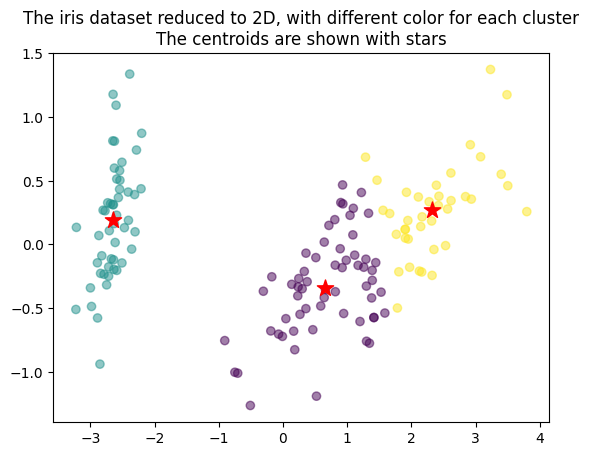

In [6]:
# displaying the transformed 2-d data points along with the centroids 
plt.scatter(X2d[:,0],X2d[:,1],c=labels,alpha=.5)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',c='red',s=150)
plt.title('The iris dataset reduced to 2D, with different color for each cluster'+\
          '\nThe centroids are shown with stars')
plt.show()